In [21]:
#TODO: 
# [\n07\nG11C019/08\nA01H005/00\n]
# [\n07\nA41D001/06\n]

# WHAT DOES THE 07 STAND FOR? 
# is this universal? do all patents have this structure? over all years?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_parquet("data/df_with_embeddings.parquet")


In [25]:
df.head(5)

,title,publication_number,publication_date,application_type,ipc_classifications,national_classifications,inventors,abstract,description,claims,application_id,abstract_characters,abstract_tokens,claims_characters,claims_tokens,description_characters,description_tokens,title_characters,title_tokens,abstract_embeddings
0,Anthurium andreanum plant named 'Anthbondem',20050005336,20050106,utility,[\n07\nG11C019/08\nA01H005/00\n],[\nUS\nPLT365000\n],"[{'first_name': 'Jan', 'last_name': 'Dijk'}]",\nA new and distinct cultivar of Anthurium and...,\n\nLATIN NAME OF THE GENUS AND SPECIES OF THE...,1\n. A new and distinct\nAnthurium andreanum\n...,10612052,643,129,105,28,9258,2306,44,13,"[[-0.024430248886346817, 0.0164019837975502, 0..."
1,Novelty jeans,20050000001,20050106,utility,[\n07\nA41D001/06\n],[\nUS\n002227000\n],"[{'first_name': 'Tina', 'last_name': 'Goldkind'}]",\nNovelty play jeans for children which includ...,\n\nBACKGROUND OF THE INVENTION \n The inventi...,1\n. A novelty jeans formed of suitable fabric...,10098856,507,104,6428,1398,23051,5122,13,4,"[[-0.01965159736573696, -0.0008666732464917004..."
2,Garment featuring means for temporarily attach...,20050000002,20050106,utility,[\n07\nA41D027/08\n],[\nUS\n002244000\n],"[{'first_name': 'Philippe', 'last_name': 'Levy...","\nA garment, such as a skirt, culottes, dress,...",\n\nFIELD OF THE INVENTION \n This invention c...,1\n. A temporary means for attaching a clothin...,10456484,744,149,2535,533,11689,2466,70,10,"[[-0.03639884665608406, 0.021299248561263084, ..."
3,Under pant garment comfort strip,20050000003,20050106,utility,[\n07\nA41B009/00\n],[\nUS\n002400000\n],"[{'first_name': 'Susan', 'last_name': 'Bushelm...",\nThe invention is a comfort strip for control...,\n\nTECHNICAL FIELD \n The invention relates t...,1\n. A comfort strip for controlling under pan...,10612516,139,28,3168,737,18160,3887,32,5,"[[-0.019800465553998947, 0.009621940553188324,..."
4,Integrated toilet and air deodorizer,20050000004,20050106,utility,[\n07\nE03D009/04\n],[\nUS\n004216000\n],"[{'first_name': 'Danny', 'last_name': 'Yun'}]","\nIn one embodiment, an integrated toilet and ...",\n\nBACKGROUND \n 1. Field \n The present inve...,1\n. An integrated toilet and air deodorizer c...,10610670,710,149,3557,795,27471,5826,36,7,"[[-0.01785619929432869, 0.03828047960996628, -..."


In [4]:
# print the embeddings and put them by colours deppending on the industry
# the industry column is ipc_classifications


# ['\n07 what is the 07?/ 
# CAN we have multiple IPC codes? 
# \nG11C019/08
# \nA01H005/00\n'

"""
https://www.wipo.int/edocs/pubdocs/en/wipo-guide-ipc-2023-en-guide-to-the-international-patent-classification-2023.pdf
PC Code Structure: An IPC code is structured as follows:

Section: The first letter represents the section of technology 
(e.g., A for Human Necessities).

Class: The two digits following the section letter represent the class 
(e.g., 01 for Agriculture; Fishing...).

Subclass: The letter after the class number represents the subclass 
(e.g., H for Plant breeding).

Group: The first one to three digits after the subclass letter indicate group
 (e.g., 005 for specific types of plants or methods for their breeding).

Subgroup: Finally, the number after the slash (/) represents the subgroup, 
providing further details
 (e.g., 00 represents a specific aspect of the plant breeding method).
 """
# create a dictionary to map the industry to a color

# create a function that given the icp code returns the industry
def split_ipc_code(ipc_list_codes):
    # get the first ipc code
    ipc_code = ipc_list_codes[0].split('\n')[2]
    
    # first letter
    ipc_section = ipc_code[0]
    # ipc_section + 2 digits
    ipc_class = ipc_code[0:3]
    # ipc_class + 1 letter
    ipc_subclass = ipc_code[0:4]
    # split using /
    ipc_group = ipc_code.split('/')[0]
    ipc_subgroup = ipc_code

    return ipc_section, ipc_class, ipc_subclass, ipc_group, ipc_subgroup


df["section"] = df['ipc_classifications'].apply(lambda x: split_ipc_code(x)[0])


In [5]:
# print all section values 
df["section"].value_counts()

#  IPC eighth edition consisting of eight sections, 129 classes, 639 subclasses, 7,314 main groups, and 61,397 subgroups

"""
A HUMAN NECESSITIES
B PERFORMING OPERATIONS; TRANSPORTING
C CHEMISTRY; METALLURGY
D TEXTILES; PAPER
E FIXED CONSTRUCTIONS
F MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS;
BLASTING
G PHYSICS
H ELECTRICITY
"""

'\nA HUMAN NECESSITIES\nB PERFORMING OPERATIONS; TRANSPORTING\nC CHEMISTRY; METALLURGY\nD TEXTILES; PAPER\nE FIXED CONSTRUCTIONS\nF MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS;\nBLASTING\nG PHYSICS\nH ELECTRICITY\n'

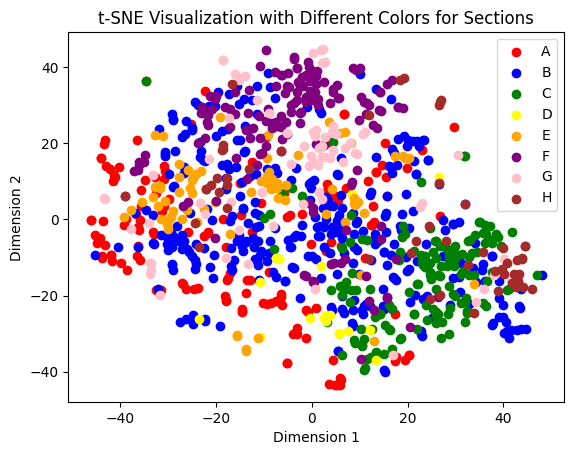

In [6]:
# t-SNE
# we will take the first vector embedding from the abstracts and use t-SNE to visualize the data 

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# take the first vector embedding from the abstracts
X = np.array([np.array(x[0]) for x in df['abstract_embeddings']])
# create t-SNE object
# tsne = TSNE()
# TODO: play with hyperparameters
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=12, learning_rate=200)

# perform t-SNE on the embedding vectors
X_tsne = tsne.fit_transform(X)

# create a color map for different sections
section_colors = {
    'A': 'red',
    'B': 'blue',
    'C': 'green',
    'D': 'yellow',
    'E': 'orange',
    'F': 'purple',
    'G': 'pink',
    'H': 'brown'
}

# hyperparameter tuning


# plot the t-SNE visualization with different colors for sections
for section in section_colors:
    plt.scatter(X_tsne[df['section'] == section, 0], X_tsne[df['section'] == section, 1], c=section_colors[section], label=section)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization with Different Colors for Sections')
plt.legend()
plt.show()


In [7]:
# # the same with umap
# import umap.umap_ as umap
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(X)
# iterable_of_colors = [section_colors[section] for section in df['section']]
# plt.scatter(embedding[:, 0], embedding[:, 1], c=iterable_of_colors, cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the dataset', fontsize=24)
# plt.show()


In [8]:
# are there female authors? T (use database of US names)
# did the patents get accepted? Y ??

# Are Patent Examiners Gender Neutral?
"""
For gender name coding, I relied on the gender distributions of first names provided by the U.S. Social Security
Administration. To avoid detecting differential behavior to non-US inventors, I include only
patent applications submitted by US inventors.

The USPTO Patents View data, which includes detailed information on both granted patents and patent applications
"""

'\nFor gender name coding, I relied on the gender distributions of first names provided by the U.S. Social Security\nAdministration. To avoid detecting differential behavior to non-US inventors, I include only\npatent applications submitted by US inventors.\n\nThe USPTO Patents View data, which includes detailed information on both granted patents and patent applications\n'

In [9]:
# open "C:\Users\Roberto\Downloads\g_application.tsv\g_application.tsv"

import pandas as pd
import numpy as np

application_granted_df = pd.read_csv("C:/Users/Roberto/Downloads/g_application.tsv/g_application.tsv", sep='\t')


C:\Users\Roberto\AppData\Local\Temp\ipykernel_16016\2557347593.py:6: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application_granted_df = pd.read_csv("C:/Users/Roberto/Downloads/g_application.tsv/g_application.tsv", sep='\t')


In [10]:
application_granted_df.tail()

# this data is pure rubish! the date is obviously wrong!!
# what is this date? 

# sort by filing_date
# application_granted_df.sort_values(by='filing_date', ascending=False)

# format 1986-04-03

# constrain the data to 2005 - 2020
# application_granted_df = application_granted_df[(application_granted_df['filing_date'] >= '2005-01-01') & (application_granted_df['filing_date'] <= '2020-12-31')]

,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
8699305,5786216,4135654,5,9177-04-11,05,0.0
8699306,5967990,4255928,5,9178-12-11,05,0.0
8699307,6474610,4474874,6,9183-03-11,06,0.0
8699308,6848010,4732727,6,9186-04-03,06,0.0
8699309,5629532,4078170,5,0975-11-06,05,0.0


In [15]:
# check if patent_id is only numeric values. 
# application_granted_df['patent_id'].str.isnumeric().all()

# give counterexamples
# application_granted_df[~application_granted_df['patent_id'].str.isnumeric()]

# you might have letters or numbers in the patent_id depending on the series code!

# check if 2494 is part of the patent_id
application_granted_df[application_granted_df['patent_id'].str.contains('6769139')] # found you! Novelty jeans.
# application_granted_df[application_granted_df['application_id'].str.contains('1090')] # found you! Novelty jeans


,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
3161775,10098856,6769139,10,2002-03-14,10,0.0


In [20]:
application_granted_df[application_granted_df['patent_id'].str.contains('7096518')]
# This is the document - US2005000....6A1 - "Body part cleansing unit for toilet "

# confirm in 2 ways that your variable "accepted pattent" is correct

# start to download female names

,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
3598433,10754976,7096518,10,2004-01-09,10,0.0


In [68]:
# this is a list of all granted applications
# Thus, if the application is not in this list, it was not granted


# merge the granted applications with the df

df.iloc[2]["inventors"]


array([{'first_name': 'Philippe', 'last_name': 'Levy'},
       {'first_name': 'Jean-Francois', 'last_name': 'Levy'}], dtype=object)

In [55]:
# merge the granted applications with the df
# the columns are 
#      - patent_id (application_granted_df)
#      - national_classifications_clean (df)

# Convert the 'application_id' column to string in both dataframes
df['application_id'] = df['application_id'].astype(str)
application_granted_df['application_id'] = application_granted_df['application_id'].astype(str)

# Now merge the dataframes
df = pd.merge(df, application_granted_df, how='left', on='application_id')

df["accepted_patent"] = df["patent_id"].notnull()


In [56]:
# number of accepted patents
df["accepted_patent"].value_counts()

accepted_patent
True     643
False    357
Name: count, dtype: int64

In [92]:
# the folder is ""C:\Users\Roberto\Desktop\names_US_SSA""
ssa_folder = "C:/Users/Roberto/Desktop/names_US_SSA"


# ssa_names = open('data/names/yob2000.txt', 'r').readlines()
# create a dictionary that maps names to gender using the Social Security Administration data

# first a dictionary taht counts how many times a name appears as male and how many as female. 
# then create a second dictionary that maps the name to mostly male, mostly female, male, female, andy and unknown

def create_dict():
    names = {}
    with open(ssa_folder, 'r') as f:
        for line in f:
            name, gender, count = line.strip().split(',')
            if name not in names:
                names[name] = {'male': 0, 'female': 0}
            if gender == 'M':
                names[name]['male'] += int(count)
            elif gender == 'F':
                names[name]['female'] += int(count)

    return names

names = create_dict()

PermissionError: [Errno 13] Permission denied: 'C:/Users/Roberto/Desktop/names_US_SSA'

In [81]:
LIST_NAME_UNKNOWNS

['A.',
 'Yoshiyukj',
 'Waldir',
 'Padmaja',
 'Padmaja',
 'Hansjorg',
 'Hisaharu',
 'Tetsuyuki',
 'Chieh',
 'Constantinos',
 'Jiri',
 'Duli',
 'Katsuro',
 'Joia',
 'N.',
 'Bod',
 'Lakdas',
 'Alver',
 'Fatehali',
 'Guenter',
 'Nariyoshi',
 'Daigoro',
 'Hidehito',
 'Nagaraj',
 'Hiromune',
 'Bedros',
 'Chenghou',
 'Durham',
 'Joerg',
 'Fumikazu',
 'Kisaburo',
 'Dhruva',
 'Dug',
 'Dah',
 'Shyh',
 'Pazhayannur',
 'Chih',
 'Chih',
 'Guenther',
 'Shohichi',
 'Shigeharu',
 'Shigeharu',
 'Garr',
 'Hiroyoshi',
 'Shirish',
 'Toyota',
 'Usaburo',
 'Takeharu',
 'Shinro',
 'Jitendra',
 'Mohith',
 'Quanyuan',
 'Chieh',
 'Chieh',
 'Shigetoshi',
 'Verreyken',
 'Bluys',
 'Hendrickx',
 'Peeters',
 'Lamotte',
 'Daizo',
 'Hachishiro',
 'Tzanis',
 'Ngy',
 'Akiyuki',
 'Naohide',
 'H.',
 'H.',
 'H.',
 'Massimillano',
 'Benoit',
 'V.',
 'Xuling',
 'E.',
 'Xuling',
 'Shek',
 'Chief',
 'Kittipat',
 'Mikihiko',
 'Stephane',
 'Jyouji',
 'Akiya',
 'Tingying',
 'Uthara',
 'Balarabe',
 'Berton',
 'Kimball',
 'G.',
 'S

In [ ]:
"""

\n07\nG11C019/08\nA01H005/00\n this is a classifciation of the kind of industry this product belongs to
[\nUS\nPLT365000\n] This might be the actual number

why are they different? 
"""

'\n\n\n07\nG11C019/08\nA01H005/00\n this is a classifciation of the kind of industry this product belongs to\n[\nUS\nPLT365000\n] This might be the actual number\n\nwhy are they different? \n'

In [ ]:
"""
example:  Anthurium andreanum plant named ‘Anthbondem’ 
key variables: 

publication_number - this is the number that was used to publish the APLICATION! US 20050005336P1

it was later published as USPP16356P3

"""

'\nexample:  Anthurium andreanum plant named ‘Anthbondem’ \nkey variables: \n\npublication_number - this is the number that was used to publish the APLICATION! US 20050005336P1\n\nit was later published as USPP16356P3\n\n'